In [1]:
!pip install catboost

   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 1.7 MB/s eta 0:01:02
   ---------------------------------------- 0.4/101.0 MB 5.8 MB/s eta 0:00:18
   ---------------------------------------- 0.5/101.0 MB 4.1 MB/s eta 0:00:25
   ---------------------------------------- 0.7/101.0 MB 4.3 MB/s eta 0:00:24
   ---------------------------------------- 0.8/101.0 MB 3.8 MB/s eta 0:00:27
   ---------------------------------------- 1.0/101.0 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.1/101.0 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.2/101.0 MB 3.5 MB/s eta 0:00:29
    --------------------------------------- 1.3/101.0 MB 3.4 MB/s eta 0:00:30
    --------------------------------------- 1.5/101.0 MB 3.3 MB/s eta 0:00:30
    --------------------------------------- 1.6/101.0 MB 3.3 MB/s eta 0:00:31
    --------------------------------------- 1.7/101.0 MB 3.2 MB/s eta 0

In [2]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 640.0 kB/s eta 0:02:36
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6 kB/s eta 0:03:25
   ---------------------------------------- 0.0/99.8 MB 487.6

In [3]:
import pandas as p
import numpy as np

In [4]:
np.__version__

'1.24.3'

In [5]:
#import the needed tools
#Regular eda and exploratory libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Models from scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [6]:
##import data
df=p.read_csv("heart-disease.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<Axes: xlabel='target'>

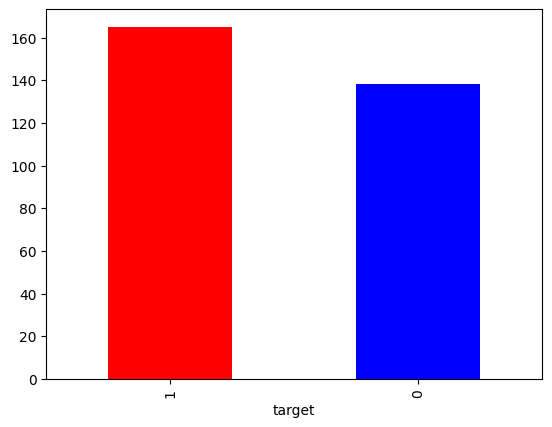

In [9]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

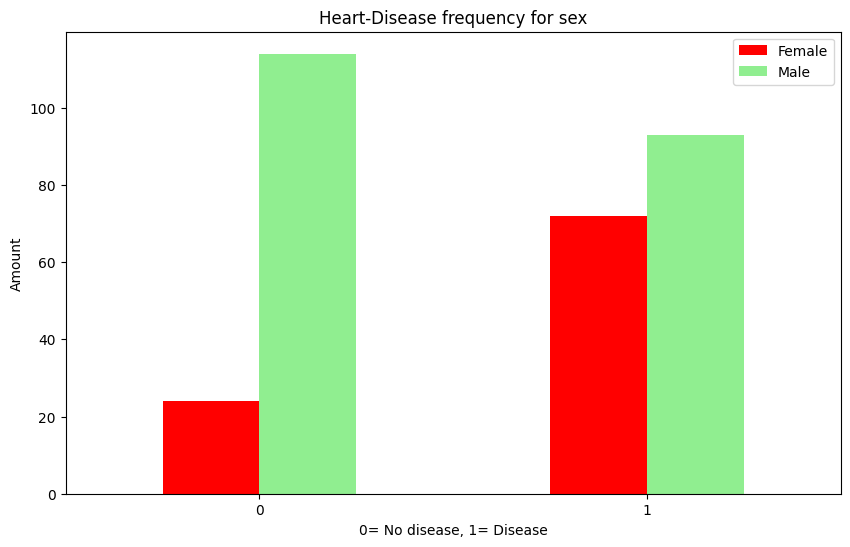

In [12]:
p.crosstab(df.target,df.sex)

p.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["red","lightgreen"]);
plt.title("Heart-Disease frequency for sex")
plt.xlabel("0= No disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

###Age vs Max. heart rate for Heart Disease

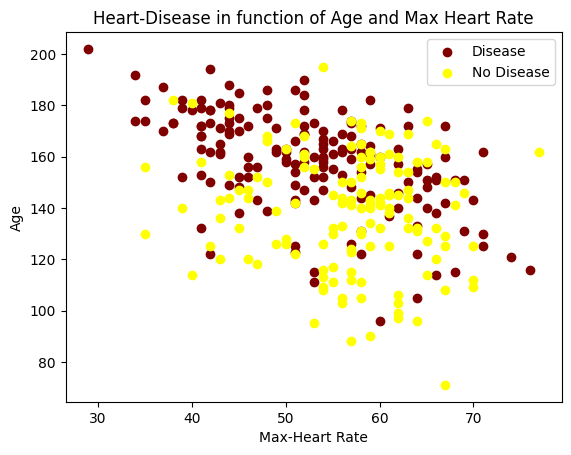

In [13]:
#scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="maroon");

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="yellow");

plt.title("Heart-Disease in function of Age and Max Heart Rate");
plt.xlabel("Max-Heart Rate");
plt.ylabel("Age")
plt.legend(["Disease","No Disease"]);

### Heart Disease Frequency Per Chest Pain Types

In [14]:
p.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


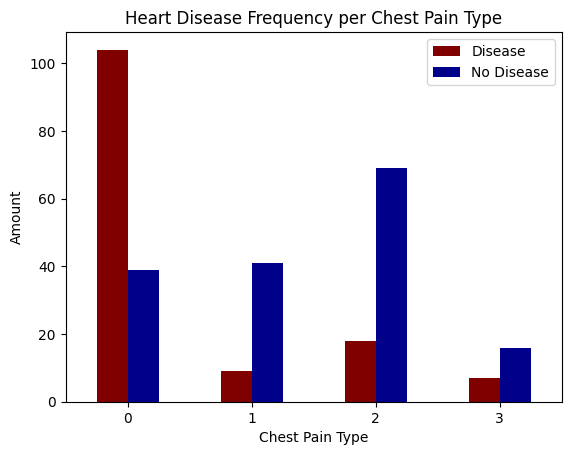

In [15]:
p.crosstab(df.cp,df.target).plot(kind="bar",color=["maroon","darkblue"])
plt.title("Heart Disease Frequency per Chest Pain Type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.legend(["Disease","No Disease"]);
plt.xticks(rotation=0);

(14.5, -0.5)

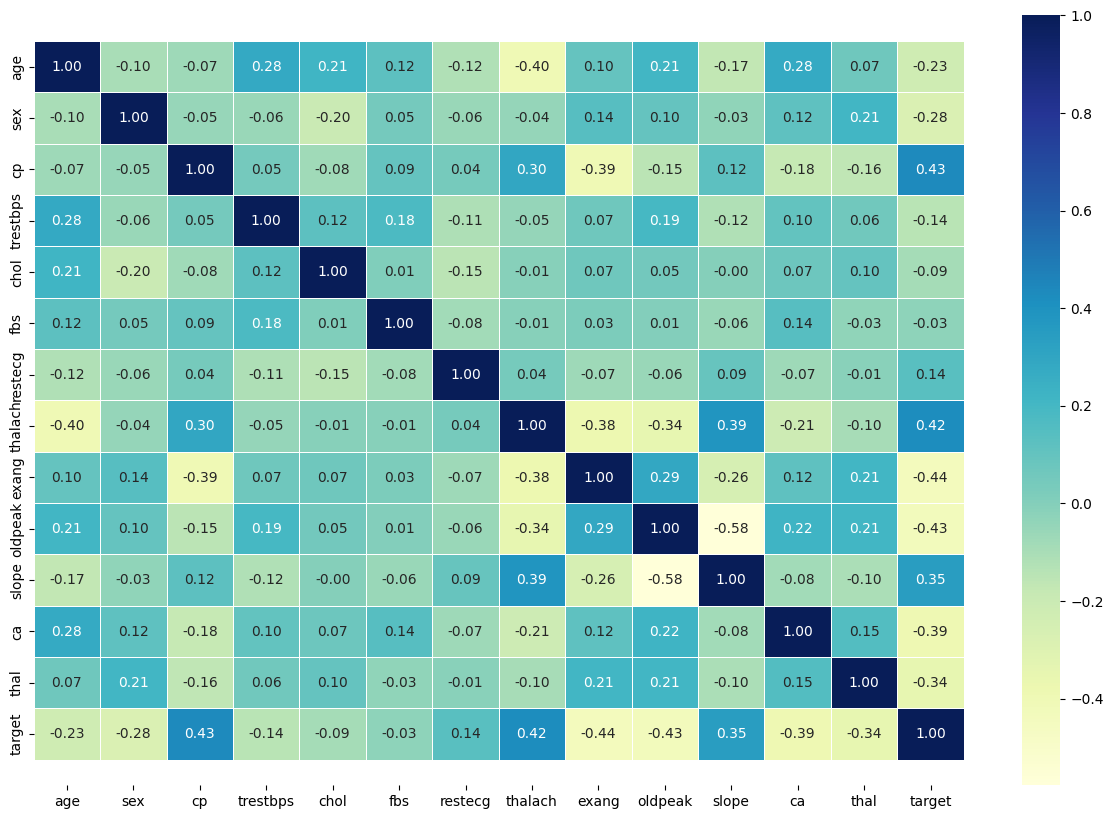

In [16]:
# Correlation matrix
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

### Modelling

In [17]:
x=df.drop("target",axis=1)
y=df["target"]
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
#Putting models in a dictionary
models={"Logistic Regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}
#Function to evaluate score of each model
def test_models(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [19]:
model_scores=test_models(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\Krishang Virmani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

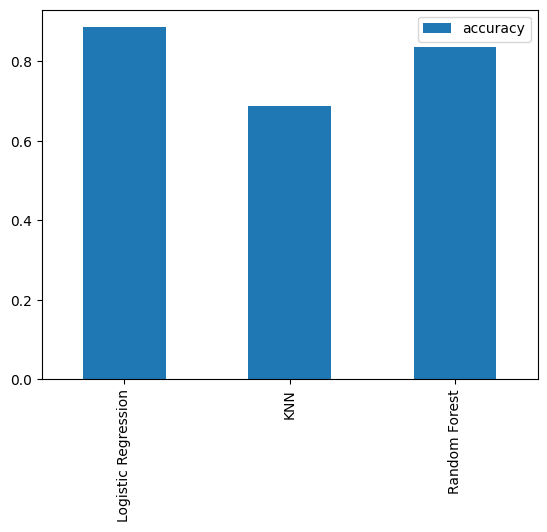

In [20]:
model_compare=p.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

### HyperParameter Tuning

Maximum score of KNN on test data:75.41%


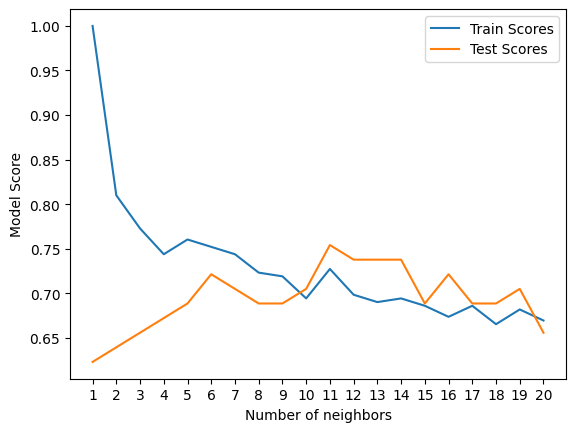

In [21]:
## Tuning of KNN
train_scores=[]
test_scores=[]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
plt.plot(neighbors,train_scores,label="Train Scores")
plt.plot(neighbors,test_scores,label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum score of KNN on test data:{max(test_scores)*100:.2f}%")


##Hyperparameter tuning with RandomizedSearchCV

In [22]:
#Hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
#Hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,500,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,8,2),"min_samples_leaf":np.arange(1,5,2)}

In [23]:
#Tune hyperparameters of Logistic Regression
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [ ]:
#Tune hyperparameters for RandomForestRegressor
rf_new=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=720,verbose=True)
rf_new.fit(x_train,y_train)

C:\Users\Krishang Virmani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 240 is smaller than n_iter=720. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [ ]:
rf_new.best_params_

In [ ]:
rf_new.score(x_test,y_test)

# Hyperparameter tuning using GridSearchCV

In [ ]:
#Tune hyperparameters for logisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train)

In [ ]:
gs_log_reg.best_params_

In [ ]:
gs_log_reg.score(x_test,y_test)

# Evaluating Model

In [ ]:
#Making predictions using tuned model
y_preds=gs_log_reg.predict(x_test)
y_preds

In [ ]:
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test)

In [ ]:
#Confusion Matrix
sns.set(font_scale=1.5)
def plot_conf_matrix(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
plot_conf_matrix(y_test,y_preds)



In [ ]:
print(classification_report(y_test,y_preds
                           ))

In [ ]:
##Calculating evaluation metrics using cross-validation
gs_log_reg.best_params_

In [ ]:
clf=LogisticRegression(C=0.23357214690901212,solver="liblinear")
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_prec=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_prec=np.mean(cv_prec)
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)

In [ ]:
cv_metrics=p.DataFrame({"Accuracy":cv_acc,"Precision":cv_prec,"Recall":cv_recall,"f1":cv_f1},index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

# Trying out Catboost

In [ ]:
x_train.head()

In [ ]:
cat_feature=[["age"],["sex"],["cp"],["trestbps"],["chol"],["fbs"],["restecg"],["thalach"],["exang"],["oldpeak"],["slope"],["ca"],["thal"]]
def train_with_catboost(x_train,y_train,x_test,y_test,cat_feature):
    catboost=CatBoostClassifier()
    cat_scores=[]
    for i in range(0,len(cat_feature)):

        catboost.fit(x_train,y_train,cat_features=cat_feature[i])
        cat_scores.append(catboost.score(x_test,y_test))
    return cat_scores

# Trying xgboost

In [ ]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

In [ ]:
xg_grid={'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5]}
grid_search=GridSearchCV(estimator=xg,param_grid=xg_grid,cv=5,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.score(x_test,y_test)

In [ ]:
grid_search.best_params_

# 2nd notebook

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [ ]:
import pickle
pickle.dump(gs_log_reg,open("heart_disease_predictor_using_log_reg.pkl","wb"))
log_reg=pickle.load(open("heart_disease_predictor_using_log_reg.pkl","rb"))

In [ ]:
df=p.read_csv("heart-disease.csv")
x=df.drop("target",axis=1)
y=df["target"]
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
def evaluate(x,y):
    prec=precision_score(x,y)
    recall=recall_score(x,y)
    f1=f1_score(x,y)
    acc=accuracy_score(x,y)
    eval_matrix={"Precision: ":prec,"Recall: ":recall,"F1: ":f1,"Accuracy: ":acc}

In [ ]:
y_preds=log_reg.predict(x_test)
result=evaluate(y_test,y_preds)
print(result)